In [57]:
import pickle
import pandas as pd
import requests
from bs4 import BeautifulSoup
import sys
import os
from collections import defaultdict
import re
import json
from collections import Counter
import dateutil
from dateutil import parser
from collections import defaultdict
from __future__ import division
import datetime
%pylab inline
from numpy import arange
import matplotlib.pyplot as plt
from patsy import dmatrices
from patsy import dmatrix
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import MovieTrend as mtf
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.mpl_style = 'default'

Populating the interactive namespace from numpy and matplotlib


#Plotting the Life of a Movie Trend Demo

###1. Load Data

In [58]:
with open('../movie_info_revised.p' ,'r') as picklefile:
    movie_data = pickle.load(picklefile)

###2. Search for genres using genre labels and keywords users asscoiated with movies
####Each movie has both genre info and keywords scraped from its movie page
#### To find a list of genres, go to http://www.imdb.com/genre/
####  Find a list of keywords at: http://www.imdb.com/search/keyword/

In [48]:
## Find the movies that match your specified genre keywords 
## and make a count of how many of those matching movies were released each year
genre_dictionary = mtf.make_genre_dictionary(movie_data, 'crime', 'or', 'gangster')

###3. Search for trends using yearly release counts for movies fitting genre criteria and a rolling mean



In [49]:
## Make a dataframe that shows the yearly release counts for the genre
## and the rolling mean we want to use
df = mtf.make_genre_data_frame(genre_dictionary, 3)
df

,count,rolling mean,proportion of prior rolling mean
1972,2,NaN,NaN
1973,16,NaN,NaN
1974,10,NaN,NaN
1975,6,9.333333,0.642857
1976,9,10.666667,0.843750
1977,5,8.333333,0.600000
1978,4,6.666667,0.600000
1979,2,6.000000,0.333333
1980,2,3.666667,0.545455
1981,3,2.666667,1.125000


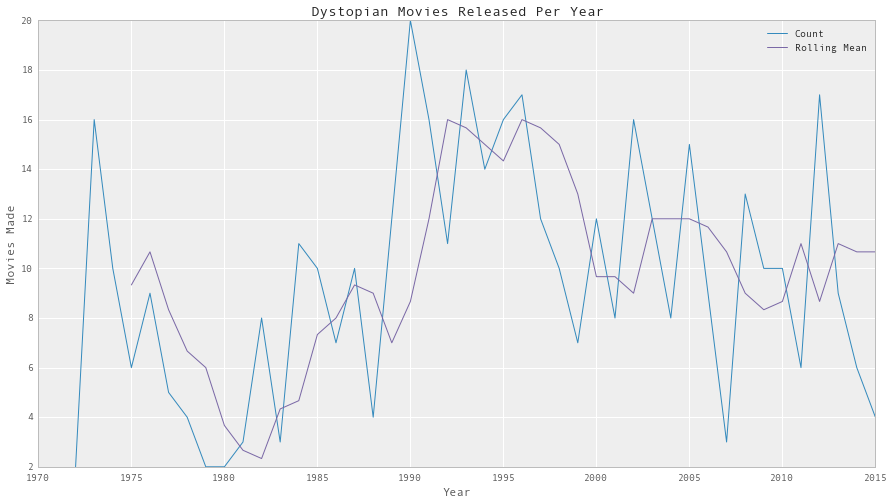

In [50]:
def plot_releases_and_rolling_mean(genre_dataframe):
    '''
    Function to plot the number of movies released each year as well as 
    the rolling mean.

    Arguments:
    df: a dataframe of movies released per year of the genre.

    Returns: a graph showing the movies released each year and the rolling mean for that year
    '''
    df_plot = genre_dataframe.reset_index()
    ## make a trend cutoff threshold that you want to use.   
    count = df_plot['count']
    rolling_mean = df_plot['rolling mean']
    difference_mean = df_plot['proportion of prior rolling mean']
    date = df_plot['index']
    figure(figsize=(15,8))
    count_line = plt.plot(date, count, label=count)
    rolling_mean_line = plt.plot(date,rolling_mean, label=rolling_mean)
    plt.legend(['Count','Rolling Mean'])
    plt.title('Dystopian Movies Released Per Year')
    plt.ylabel('Movies Made')
    plt.xlabel('Year')
    plt.show()

## plot the release count and the rolling mean (the mean of the previous n years)
plot_releases_and_rolling_mean(df)

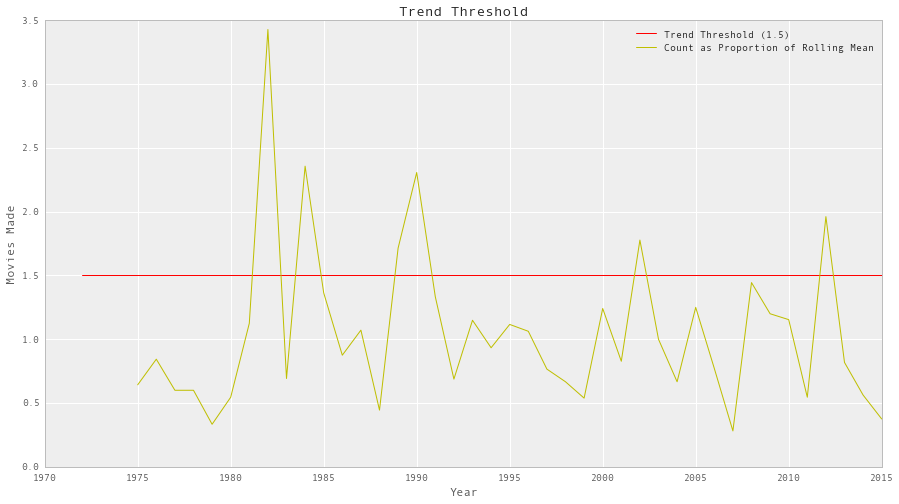

In [51]:
def plot_trendiness(genre_dataframe, trend_threshold):
    '''
    Function to plot the difference between the movies released per year and the previous
    3 year mean. If year features many more movies of a trend released than in years prior, we
    can say it is "trending."
    The threshold argument allows you to determine what the cutoff is to define 'trending'

    Arguments:
    df: a dataframe of movies released per year of the genre. 
    trend_proportion_threshold: movies above this proportion threshold will be considered "trending"



    Returns: a graph showing the trendiness of a movie for each year
    '''
    df_plot = genre_dataframe.reset_index()
    df_plot['trend_cutoff'] = trend_threshold
    count = df_plot['count']
    rolling_mean = df_plot['rolling mean']
    difference_mean = df_plot['proportion of prior rolling mean']
    date = df_plot['index']
    cutoff = df_plot['trend_cutoff']
    figure(figsize=(15,8))
    count_line = plt.plot(date, cutoff, 'r-', label=count)
    rolling_mean_line = plt.plot(date, difference_mean, 'y-', label=count)
    plt.legend(['Trend Threshold ({})'.format(trend_threshold), 'Count as Proportion of Rolling Mean'])
    plt.title('Trend Threshold')
    plt.ylabel('Movies Made')
    plt.xlabel('Year')
    plt.show()

## plot which years had counts more than 1.5 times the rolling mean
plot_trendiness(df, 1.5)

###4. Plot the life of any found trends by plotting date released against opening weekend gross sales per screen released

In [52]:
movie_info_dict = mtf.make_genre_movie_info_dict(movie_data, 'Crime', 'gangster')

In [53]:
genre_df = mtf.make_genre_df(movie_info_dict, 50)

In [54]:
genre_df

,level_0,level_1,date,screens,opening,normalized_opening
0,1982,Dead Men Don't Wear Plaid,1982-05-21,882,4289601,4863.493197
1,1982,Death Wish II,1982-02-20,377,1871487,4964.156499
2,1982,Monsignor,1982-10-22,857,3631834,4237.845974
3,1984,Against All Odds,1984-03-02,976,3766128,3858.737705
4,1984,Johnny Dangerously,1984-12-21,1086,2947746,2714.314917
5,1984,Once Upon a Time in America,1984-09-28,894,2412014,2698.002237
6,1984,Runaway,1984-12-14,720,1198279,1664.276389
7,1985,Death Wish 3,1985-11-01,1460,5319116,3643.230137
8,1985,Prizzi's Honor,1985-06-14,719,4234537,5889.481224
9,1985,Stick,1985-04-26,1173,3358299,2863.000000


/Users/David/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:17: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


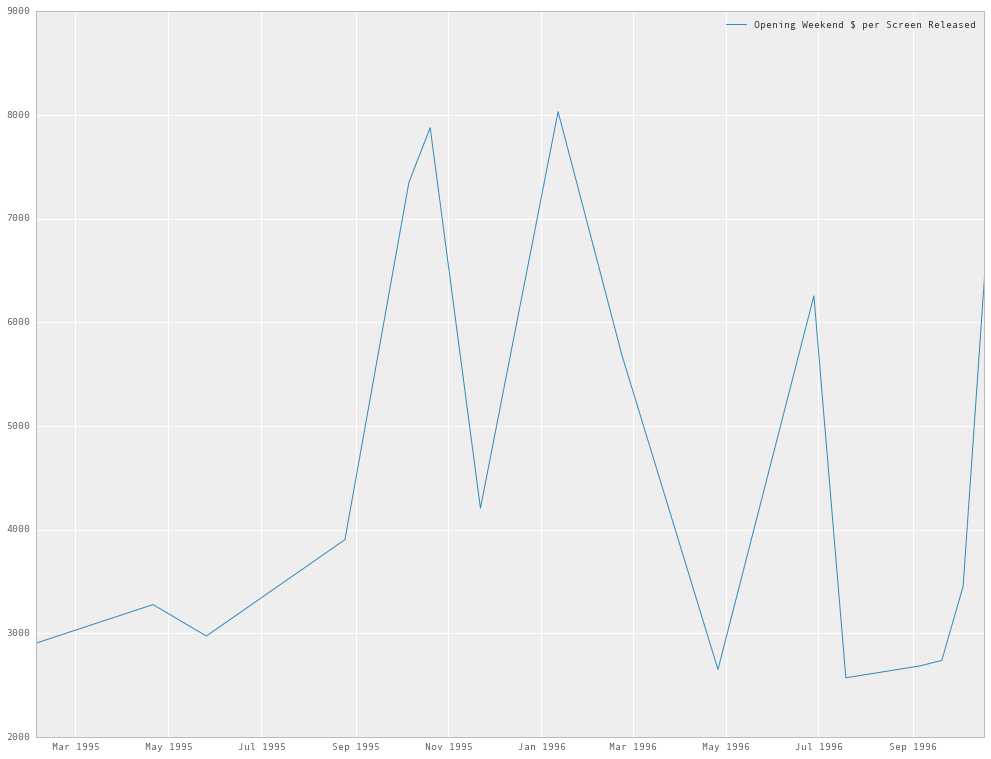

In [55]:
def plot_trend(genre_df, start_year, end_year):
    '''
    Takes a dataframe with all the movies of a trend and their box office stats
    and plots them in chronological order to see how the trend plays out over time.
    
    
    Arguments:
        trend_df: a dataframe with the trend info
        start_year: starting year of the trend
        end_year: ending year of the trend
    
    Returns: 
        a plot graphing the trend
    '''
    trend_df = genre_df[genre_df['level_0'].isin([i for i in range(start_year, end_year+ 1)])]
    figure(figsize=(17,13))
    trend_df = trend_df.sort(['date'])
    plt.plot(trend_df['date'], trend_df['normalized_opening'])
    plt.legend(["Opening Weekend $ per Screen Released"])
    return plt.show()


## plot trend
plot_trend(genre_df, 1995, 1996)


In [56]:
trend_df

,level_0,level_1,date,screens,opening,normalized_opening,time_delta,time_delta_num,season
72,1995,The Jerky Boys,1995-02-03,1513,4392403,2903.108394,33 days 00:00:00,33,Spring
70,1995,Kiss of Death,1995-04-21,1623,5317066,3276.072705,110 days 00:00:00,110,Spring
69,1995,Johnny Mnemonic,1995-05-26,2030,6033850,2972.339901,145 days 00:00:00,145,Summer
67,1995,Desperado,1995-08-25,2027,7910446,3902.538727,236 days 00:00:00,236,Summer
66,1995,Dead Presidents,1995-10-06,1081,7943778,7348.545791,278 days 00:00:00,278,Fall
68,1995,Get Shorty,1995-10-20,1612,12700007,7878.416253,292 days 00:00:00,292,Fall
71,1995,Money Train,1995-11-22,2522,10608297,4206.303331,325 days 00:00:00,325,Winter
75,1996,Don't Be a Menace to South Central While Drink...,1996-01-12,1010,8112884,8032.558416,376 days 00:00:00,376,Winter
79,1996,Rumble in the Bronx,1996-02-23,1736,9858380,5678.790323,418 days 00:00:00,418,Spring
78,1996,Mulholland Falls,1996-04-26,1625,4306221,2649.982154,481 days 00:00:00,481,Spring


In [39]:
trend_df = mtf.prepare_df_for_LR(genre_df, 1995, 1996)
trend_df

,level_0,level_1,date,screens,opening,normalized_opening,time_delta,time_delta_num,season
72,1995,The Jerky Boys,1995-02-03,1513,4392403,2903.108394,33 days 00:00:00,33,Spring
70,1995,Kiss of Death,1995-04-21,1623,5317066,3276.072705,110 days 00:00:00,110,Spring
69,1995,Johnny Mnemonic,1995-05-26,2030,6033850,2972.339901,145 days 00:00:00,145,Summer
67,1995,Desperado,1995-08-25,2027,7910446,3902.538727,236 days 00:00:00,236,Summer
66,1995,Dead Presidents,1995-10-06,1081,7943778,7348.545791,278 days 00:00:00,278,Fall
68,1995,Get Shorty,1995-10-20,1612,12700007,7878.416253,292 days 00:00:00,292,Fall
71,1995,Money Train,1995-11-22,2522,10608297,4206.303331,325 days 00:00:00,325,Winter
75,1996,Don't Be a Menace to South Central While Drink...,1996-01-12,1010,8112884,8032.558416,376 days 00:00:00,376,Winter
79,1996,Rumble in the Bronx,1996-02-23,1736,9858380,5678.790323,418 days 00:00:00,418,Spring
78,1996,Mulholland Falls,1996-04-26,1625,4306221,2649.982154,481 days 00:00:00,481,Spring


###5. Plot linear regression of opening gross/screen over time since the trend started using the season the movie was released in as a feature

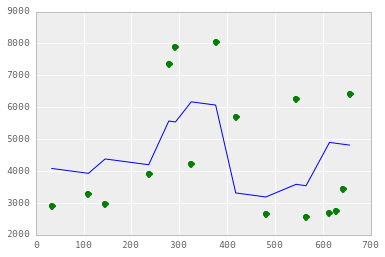

In [166]:
#plot the linear regression using trend_df dataframe
y, X = dmatrices('normalized_opening ~ time_delta_num + season ', data = trend_df, return_type= 'dataframe')
model = sm.OLS(y, X)
fitted = model.fit()
plot(X['time_delta_num'], y, 'go')
plot(X['time_delta_num'], fitted.fittedvalues, 'b')




In [127]:
## see results
model.fit().summary()

/Users/David/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     normalized_opening   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                 -0.147
Method:                 Least Squares   F-statistic:                    0.5515
Date:                Thu, 03 Dec 2015   Prob (F-statistic):              0.703
Time:                        22:59:55   Log-Likelihood:                -132.92
No. Observations:                  15   AIC:                             275.8
Df Residuals:                      10   BIC:                             279.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept         4785.3274   1217.339      3.931      0.003      2072.927  7497.728
season[T.Spring] -1207.3727   1742.951     -0.693      0.504     -5090.909  2676.163
season[T.Summer]  -836.8577   1548.007     -0.541      0.601     -4286.032  2612.316
season[T.Winter]  1343.5206   1895.140      0.709      0.495     -2879.115  5566.156
time_delta_num      -0.6495      3.385     -0.192      0.852        -8.193     6.894
==============================================================================
Omnibus:                        3.717   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                1.776
Skew:                           0.539   Prob(JB):                        0.411
Kurtosis:                       1.704   Cond. No.                     1.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""